In [163]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
font = {'family' : 'sans serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [164]:
TC_rho= pd.read_csv(r'../2_inter-comparison/Data/TC_dekad_rho2.csv',index_col=0)
TC_stderr = pd.read_csv(r'../2_inter-comparison/Data/TC_dekad_stderr2.csv',index_col=0)
DC = pd.read_csv(r'../1_insitu-comparison/Data/DC_dekad.csv',index_col=0)

# Standard error

In [165]:
TC_stderr['In-situ DC']=DC['rmse']
TC_stderr=TC_stderr.dropna()
TC_stderr=TC_stderr.set_index('LCC')
TC_stderr_T=TC_stderr.T

In [166]:
# sns.heatmap(TC_stderr,annot=True)
# plt.title('Random error (mm/day)')


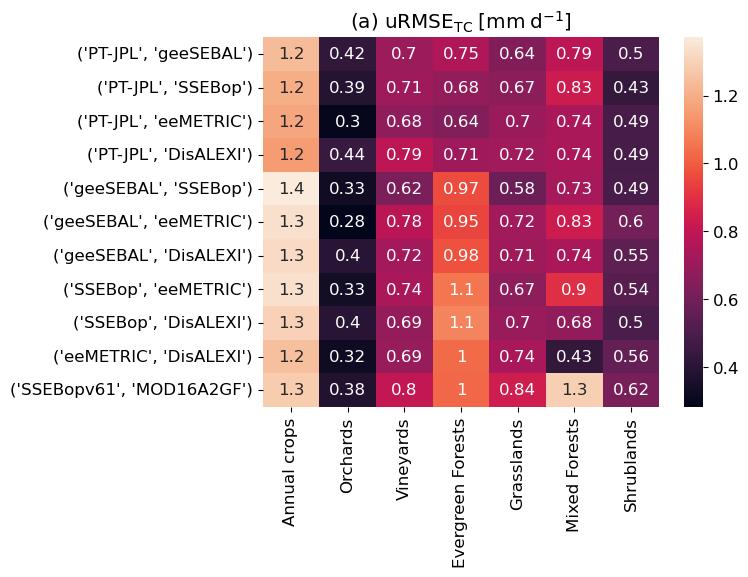

In [167]:
sns.heatmap(TC_stderr_T[:-1],annot=True)
plt.gca().set_xlabel('')
plt.title(r'(a) $\mathrm{uRMSE_{TC}\;[mm\;d^{-1}]}$')
plt.savefig(r'Figure\5-10a.png',bbox_inches='tight',dpi=300)

## L2 Norm (Euclidean distance)

In [201]:
# Compute Euclidean distance between each row and 'In-situ DC'
df = TC_stderr_T
distances = df.apply(lambda row: np.linalg.norm(row - df.loc['In-situ DC']), axis=1)

# Exclude the 'In-situ DC' row itself
distances = distances.drop("In-situ DC")

distances.idxmin()

"('PT-JPL', 'eeMETRIC')"

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_4888\2300179690.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$d(\mathrm{uRMSE_{TC},uRMSE_{val})\;[mm\;d^{-1}]}$')


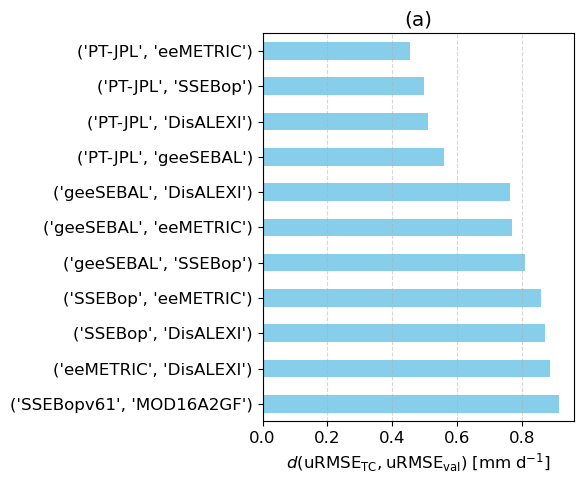

In [202]:
# Sort distances
distances_sorted = distances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 5))
distances_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('$d(\mathrm{uRMSE_{TC},uRMSE_{val})\;[mm\;d^{-1}]}$')
plt.title('(a)')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(r'Figure/5-12a.png',bbox_inches ='tight')
plt.show()

## average per land cover class

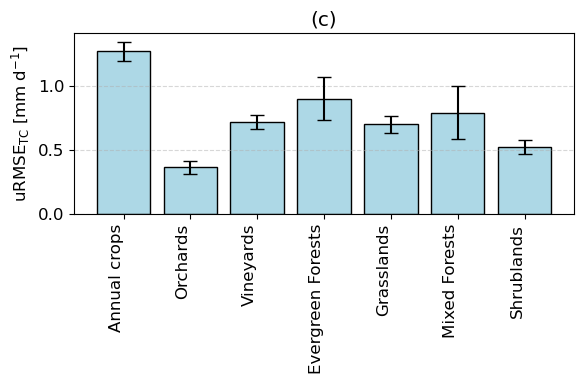

In [172]:
df_no_insitu = df.drop('In-situ DC')
mean_vals = df_no_insitu.mean()
std_vals = df_no_insitu.std()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(mean_vals.index, mean_vals.values, yerr=std_vals.values, capsize=5, color='lightblue', edgecolor='black')

plt.xticks(rotation=90, ha='right')
plt.ylabel(r'$\mathrm{uRMSE_{TC}\;[mm\;d^{-1}]}$')
plt.title('(c)')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig(r'Figure\5-10c.png',bbox_inches='tight',dpi=300)
plt.show()

In [173]:
mean_vals

LCC
Annual crops         1.269577
Orchards             0.363216
Vineyards            0.720323
Evergreen Forests    0.898767
Grasslands           0.697793
Mixed Forests        0.790989
Shrublands           0.523880
dtype: float64

# Correlation

In [174]:
TC_rho['In-situ DC']=DC['cor']
TC_rho=TC_rho.dropna()
TC_rho=TC_rho.set_index('LCC')
TC_rho_T=TC_rho.T

In [175]:
# sns.heatmap(TC_rho,annot=True, annot_kws={"fontsize":10})
# plt.title('Correlation coefficient')

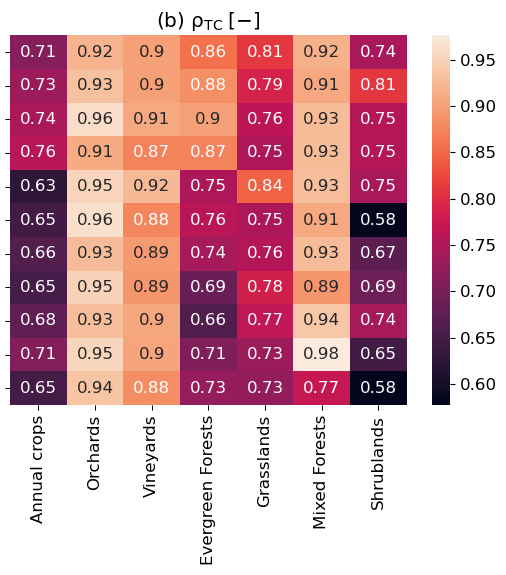

In [176]:
sns.heatmap(TC_rho_T[:-1],annot=True)
plt.gca().set_xlabel('')
plt.gca().set_yticklabels([])
plt.title(r'(b) $\mathrm{\rho_{TC}\;[-]}$')
plt.savefig(r'Figure\5-10b.png',bbox_inches='tight',dpi=300)

## L2 Norm (Euclidean Distance)

Use Euclidean distance if all columns are on similar scales and to minimize total error.

('PT-JPL', 'geeSEBAL')


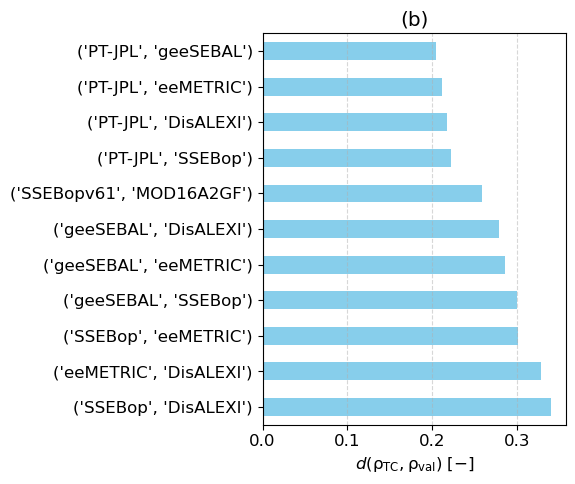

In [177]:
# Compute Euclidean distance between each row and 'In-situ DC'
df = TC_rho_T
distances = df.apply(lambda row: np.linalg.norm(row - df.loc['In-situ DC']), axis=1)

# Exclude the 'In-situ DC' row itself
distances = distances.drop("In-situ DC")

print(distances.idxmin())

# Sort distances
distances_sorted = distances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 5))
distances_sorted.plot(kind='barh', color='skyblue')
plt.xlabel(r'$d(\mathrm{\rho_{TC},\rho_{val})\;[-]}$')
plt.title('(b)')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(r'Figure/5-12b.png',bbox_inches ='tight')
plt.show()

## L1 Norm (Manhattan Distance)
Use Manhattan distance if robustness to outliers is important.

('PT-JPL', 'geeSEBAL')


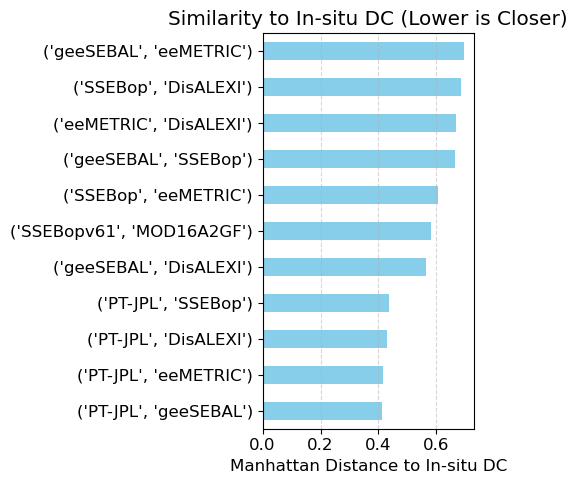

In [178]:
df = TC_rho_T
distances = df.apply(lambda row: np.abs(row - df.loc['In-situ DC']).sum(), axis=1)
distances = distances.drop("In-situ DC")
print(distances.idxmin())

# Sort distances
distances_sorted = distances.sort_values()

# Plot
plt.figure(figsize=(5, 5))
distances_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Manhattan Distance to In-situ DC')
plt.title('Similarity to In-situ DC (Lower is Closer)')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Cosine Similarity

In [179]:
from sklearn.metrics.pairwise import cosine_similarity

# Convert to matrix
df = TC_rho_T
data = df.drop("In-situ DC")
reference = df.loc[["In-situ DC"]]

# Compute cosine similarity
similarities = cosine_similarity(data, reference)

# Get the row with highest similarity
data.index[similarities.argmax()]

"('PT-JPL', 'eeMETRIC')"

## average per land cover class

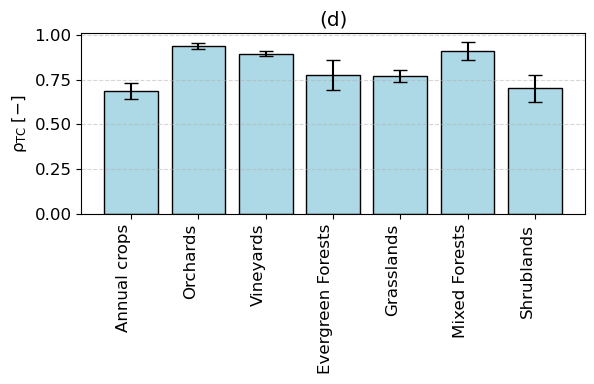

In [180]:
df_no_insitu = df.drop('In-situ DC')
mean_vals = df_no_insitu.mean()
std_vals = df_no_insitu.std()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(mean_vals.index, mean_vals.values, yerr=std_vals.values, capsize=5, color='lightblue', edgecolor='black')

plt.xticks(rotation=90, ha='right')
plt.ylabel(r'$\mathrm{\rho_{TC}\;[-]}$')
plt.title('(d)')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig(r'Figure\5-10d.png',bbox_inches='tight',dpi=300)
plt.show()

In [181]:
mean_vals

LCC
Annual crops         0.688418
Orchards             0.939139
Vineyards            0.895478
Evergreen Forests    0.776276
Grasslands           0.769726
Mixed Forests        0.910274
Shrublands           0.701690
dtype: float64

# Dots

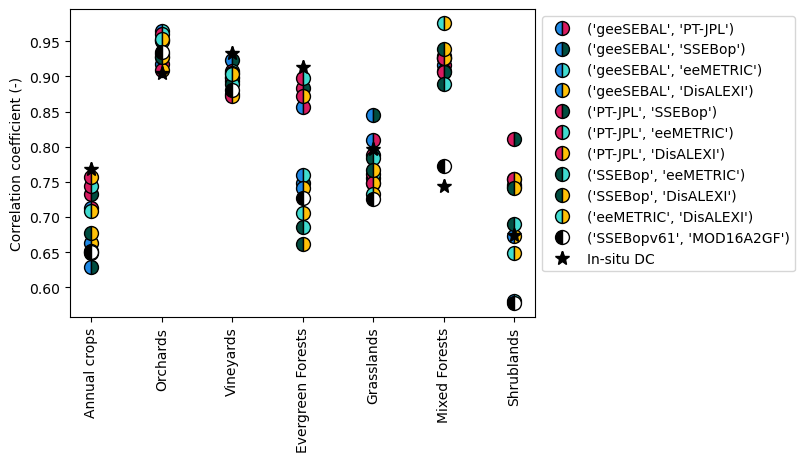

In [76]:
# Default marker style template

# Function to create customized marker styles based on column names
def get_marker_style(label):
    default_marker_style = dict(color='tab:blue', linestyle='', marker='o', markersize=10, markerfacecoloralt='tab:red')
    color_mapping = {
    'geeSEBAL': '#1E88E5',
    'PT-JPL': '#D81B60',
    'SSEBop': '#004D40',
    'DisALEXI': '#FFC107',
    'eeMETRIC': '#40DBCF',
    'SSEBopv61': '#000000',
    'MOD16A2GF': '#FFFFFF'
    }
    # Start with a copy of the default style
    style = default_marker_style.copy()
    if label == 'In-situ DC':
        style= dict(color='k', linestyle='', marker='*', markersize=10, markerfacecoloralt='k')
    else:
        # Customize color based on keywords in label
        style['color'] = color_mapping[label.split("'")[1]]
        style['markerfacecoloralt'] = color_mapping[label.split("'")[3]] 

    return style

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6,4))

# Plot each dataset individually with its customized style
for label in TC_rho.columns:
    style = get_marker_style(label)
    ax.plot(
        TC_rho.index, TC_rho[label],
        label=label,
        fillstyle='left',
        color=style['color'],
        linestyle=style['linestyle'],
        marker=style['marker'],
        markersize=style['markersize'],
        markerfacecoloralt=style['markerfacecoloralt'],
        markeredgecolor='k'
    )

# Customize labels and legend
ax.set_ylabel('Correlation coefficient (-)')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

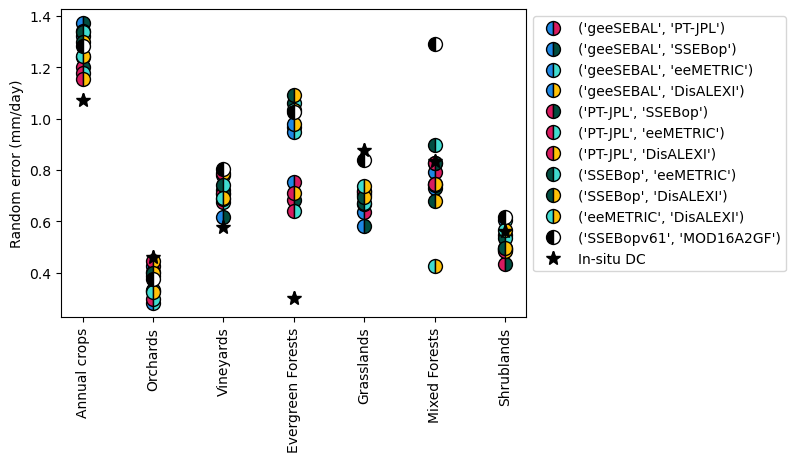

In [82]:
# Default marker style template

# Function to create customized marker styles based on column names
def get_marker_style(label):
    default_marker_style = dict(color='tab:blue', linestyle='', marker='o', markersize=10, markerfacecoloralt='tab:red')
    color_mapping = {
    'geeSEBAL': '#1E88E5',
    'PT-JPL': '#D81B60',
    'SSEBop': '#004D40',
    'DisALEXI': '#FFC107',
    'eeMETRIC': '#40DBCF',
    'SSEBopv61': '#000000',
    'MOD16A2GF': '#FFFFFF'        
}
    # Start with a copy of the default style
    style = default_marker_style.copy()
    if label == 'In-situ DC':
        style= dict(color='k', linestyle='', marker='*', markersize=10, markerfacecoloralt='k')
    else:
        # Customize color based on keywords in label
        style['color'] = color_mapping[label.split("'")[1]]
        style['markerfacecoloralt'] = color_mapping[label.split("'")[3]] 

    return style

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6,4))

# Plot each dataset individually with its customized style
for label in TC_stderr.columns:
    style = get_marker_style(label)
    ax.plot(
        TC_stderr.index, TC_stderr[label],
        label=label,
        fillstyle='left',
        color=style['color'],
        linestyle=style['linestyle'],
        marker=style['marker'],
        markersize=style['markersize'],
        markerfacecoloralt=style['markerfacecoloralt'],
        markeredgecolor='k'
    )

# Customize labels and legend
ax.set_ylabel('Random error (mm/day)')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()